Blackjack 
======

Instructions
----

Your task is to implement the card game Blackjack. We have provided a lot of starter code to help guide you. 

You can find a set of rules for Blackjack [here](https://bicyclecards.com/how-to-play/blackjack/). 

Then, simulate a computer player against the “house”. You'll run that simulation many times, putting the results into a pandas dataframe. Finally, you'll analyze and interpret the results.

Here is an example of a game play:  
Deal 'em up:

Player's score: 17 	 Player's hand: ['K♠', '7◆']  
House's score:  15 	 House's hand:  ['A♣', '4♥']  

Player's score: 27 	 Player's hand: ['K♠', '7◆', 'J♣']  
House's score:  15 	 House's hand:  ['A♣', '4♥']  

Player went bust. House wins!  

Implement game
---------

In [94]:
# These are Python Standard Library modules you'll use later 
import random

Define the deck of cards as a list of strings. Each string will be single card with a rank and suit.

Here are examples:
- `A♠` for Ace of Spades
- `Q♥` for Queen of Hearts  
- `7◆` for 7 of Diamonds
- `⒑♣` for 10 of Clubs

Note - `⒑` is a single character. You should copy and paste that character into your code. Having the concept 10 represented as a single character keeps the slicing consistent for all ranks. 

The deck should be shuffled (i.e., the cards will appear in random order).

In [95]:
# list of all possible card values
values = ["2", "3", "4", "5", "6", "7", "8", "9", "⒑", "J",
          "Q", "K", "A"]

# list of all possible card suits
suits = ["♠", "♣", "♥", "◆"]

def define_deck():
    """function to create a full deck of cards - combine all values with all 
    suits and shuffle deck"""
    deck = []
    
    for v in values:
        for s in suits:
            deck.append(v + s)
    random.shuffle(deck)
    return deck
    

# A set of tests to check if the code you wrote is correct 
# Test deck
deck = define_deck()
assert len(deck) == 52
assert type(deck) == list
assert [type(card) == str for card in deck]
assert [len(card)  == 2   for card in deck]

# Test that deck is shuffled 
deck_1 = define_deck()
deck_2 = define_deck()
assert deck_1 != deck_2 # There is a very small chance this would fail by mistake.

Complete the following function that creates the points for each card. The data structure should be a dictionary where each key is a card and the value is the points for the card. 

Numbered cards worth their numerical value (i.e., a `2` is worth 2 points).  Face cards are worth 10 points.  To simplify, assume an ace is always worth 11 points.

In [96]:
def assign_points(deck):
    """Function that assigns point values for each card based on the numerical value,
    Face cards = 10, Aces = 11"""
    card_points = {}
    number = [i for i in range(2, 10)]
    for card in deck:
        # cards 2 - 9
        if card[0] in str(number):
            card_points[card[0]] = int(card[0])
        # cards 10 - King
        elif (card[0] == 'J') | (card[0] == 'Q') | (card[0] == 'K') | (card[0] == '⒑'):
            card_points[card[0]] = 10
        # Ace 
        elif card[0] == 'A':
            card_points[card[0]] = 11
    return card_points

# Test point mapping
point_mapping = assign_points(deck)
assert type(point_mapping) == dict
for number in range(2, 10):
    assert [number == value for key, value in point_mapping.items() if key.startswith(str(number))]
assert [number == 11 for key, value in point_mapping.items() if key.startswith("A")]
for letter in '⒑JQK':
    assert [number == 10 for key, value in point_mapping.items() if key.startswith(letter)]

Complete the following function that deals a single card from the current deck. If there are no more cards in the deck, call define_deck() to create a new deck.

In [97]:
def deal_card(deck):
    """Function to deal a single card, if there are 0 cards in the deck, shuffle deck
    by calling define_deck function"""
    if len(deck) == 0:
        deck = define_deck()
    card = deck.pop(0)
    return card, deck

# Tests
deck = define_deck()
assert len(deck) == 52
card, deck = deal_card(deck)
assert len(card) == 2
assert len(deck) == 51

# Test for creating new decks
deck = define_deck()
for _ in range(10_000):
    card, deck = deal_card(deck)

Complete the following function that deals the initial hand of 2 cards to both the player and the house.

In [98]:
def deal_initial_hands(deck):
    """Function to deal 2 cards to the player and the house"""
    player_hand = []
    house_hand = []
    while len(player_hand) <= 1:
        player_hand.append(deck.pop(0))
        house_hand.append(deck.pop(0))
    return player_hand, house_hand, deck    

# Tests
deck = define_deck()
assert len(deck) == 52
player_hand, house_hand, deck = deal_initial_hands(deck)
assert len(player_hand) ==  2
assert len(house_hand)  ==  2
assert len(deck)        == 48

Complete the following function that sums up the points in the current hand.

In [99]:
def current_score(hand, point_mapping):
    """Function to score the current hand"""
    hand_score = 0
    for card in hand:
        hand_score += point_mapping[card[0]]
    return hand_score

# Tests
hand=['J♠', '5♥']
assert type(current_score(hand, point_mapping)) == int
assert current_score(hand, point_mapping) == 15

Complete the following function that implements the computer's strategry.

You are required to implement two strategies:
1. conventional - Hit if the sum of the current hand is less than 16.
2. heavy_hitter - Hit if the sum of the current hand is less than 18.

Update `hiting_status`, if the agent is going to hold (aka, not take any more cards) on subsequent rounds.

In [122]:
def apply_strategy(hand, hitting_status, current_strategy='conventional'):
    """Function to define and implement three strategies"""
    hand_score = current_score(hand, point_mapping)
    
    # Conventional, hitting
    if (current_strategy == 'conventional') & (hand_score < 16):
        hitting_status = True
        return ('hit', hitting_status)
    # Conventional, holding
    elif (current_strategy == 'conventional') & (hand_score >= 16):
        hitting_status = False
        return ('hold', hitting_status)
    
    # Heavy, hitting
    elif (current_strategy == 'heavy_hitter') & (hand_score < 18):
        hitting_status = True
        return ('hit', hitting_status)
    # Heavy, holding
    elif (current_strategy == 'heavy_hitter') & (hand_score >= 18):
        hitting_status = False
        return ('hold', hitting_status)
   
    # Safe, hitting - third strategy trying out
    elif (current_strategy == 'safe_hitter') & (hand_score < 11):
        hitting_status = True
        return ('hit', hitting_status)
    # Safe, holding
    elif (current_strategy == 'safe_hitter') & (hand_score >= 11):
        hitting_status = False
        return ('hold', hitting_status)
    
    
# Tests

# Test conventional strategy 
assert apply_strategy(hand=['J♠', '5♥'], hitting_status=True, current_strategy='conventional') == ('hit',  True)
assert apply_strategy(hand=['J♠', '6♥'], hitting_status=True, current_strategy='conventional') == ('hold', False)
assert apply_strategy(hand=['J♠', '7♥'], hitting_status=True, current_strategy='conventional') == ('hold', False)
assert apply_strategy(hand=['J♠', '8♥'], hitting_status=True, current_strategy='conventional') == ('hold', False)

# Test heavy hitter strategy 
assert apply_strategy(hand=['J♠', '5♥'], hitting_status=True, current_strategy='heavy_hitter') == ('hit',  True)
assert apply_strategy(hand=['J♠', '6♥'], hitting_status=True, current_strategy='heavy_hitter') == ('hit',  True)
assert apply_strategy(hand=['J♠', '7♥'], hitting_status=True, current_strategy='heavy_hitter') == ('hit',  True)
assert apply_strategy(hand=['J♠', '8♥'], hitting_status=True, current_strategy='heavy_hitter') == ('hold', False)

The follwing function is given for you, there is no code for you to write in this cell.

In [101]:
def display_hands(player_hand, house_hand):
    # Function to display hand and scores for both agents
    print(f"Player's score: {current_score(player_hand, point_mapping):2} \t Player's hand: {player_hand}")
    print(f"House's score:  {current_score(house_hand, point_mapping):2} \t House's hand:  {house_hand}")
    print()

Complete the following function that checks what is going on with each agent's hand.

Part of the logic is already given to you. Each line/part that requires you to write code is labeled with a `# TODO: `

In [125]:
def check_hands(player_hand, player_hitting, house_hand, house_hitting, keep_playing=True):
    """Function to determine winner based on hands"""
    # Set defaults
    winner = None 
    keep_playing = True
    
    player_score = current_score(player_hand, point_mapping)
    house_score = current_score(house_hand, point_mapping)
    
    # Check for Blackjack(s)
    if (house_score == 21) & (player_score == 21):
        winner = 'tie'
        keep_playing = False
        
    elif (house_score == 21) & (player_score != 21):
        winner = 'house'
        keep_playing = False
        
    elif (player_score == 21) & (house_score != 21):
        winner = 'player'
        keep_playing = False
        
        
    # Check for going bust
    elif (player_score > 21) & (house_score <= 21):
        winner = 'house'
        keep_playing = False
    elif (player_score <= 21) & (house_score > 21):
        winner = 'player'
        keep_playing = False
        
        
    # Check for player(s) holding
    elif (player_hitting == False) & (house_hitting == False) & (house_score > player_score):
        winner = 'house'
        keep_playing = False
    elif (player_hitting == False) & (house_hitting == False) & (player_score > house_score):
        winner = 'player'
        keep_playing = False

        
    # Check for tie 
    elif (player_hitting == False) & (house_hitting == False) & (house_score == player_score):
        winner = 'tie'
        keep_playing = False
        
    elif (player_score > 21) & (house_score > 21):
        winner = 'tie'
        keep_playing = False
    
    return winner, keep_playing

# Tests

# Check for Blackjack(s)
assert check_hands(player_hand=['A♠', 'Q♠'], player_hitting=False, house_hand=['A♥', 'Q♥'], house_hitting=False) == ('tie', False)
assert check_hands(player_hand=['A♠', 'Q♥'], player_hitting=False, house_hand=['J♠', 'Q♠'], house_hitting=False) == ('player', False)
assert check_hands(player_hand=['2♠', '2♥'], player_hitting=False, house_hand=['A♠', 'Q♥'], house_hitting=False) == ('house', False)

# Check for going bust
assert check_hands(player_hand=['A♠', 'A♥'], player_hitting=False, house_hand=['2♠', '2♥'], house_hitting=False) == ('house', False)
assert check_hands(player_hand=['2♠', '2♥'], player_hitting=False, house_hand=['A♠', 'A♥'], house_hitting=False) == ('player', False)


# Check for holding
assert check_hands(player_hand=['3♠', '3♥'], player_hitting=False, house_hand=['2♠', '2♥'], house_hitting=False) == ('player', False)
assert check_hands(player_hand=['2♠', '2♥'], player_hitting=False, house_hand=['3♠', '3♥'], house_hitting=False) == ('house', False)

# Check for tie
assert check_hands(player_hand=['2◆', '2♣'], player_hitting=False, house_hand=['2♠', '2♥'], house_hitting=False) == ('tie', False)


This is the game play!

Part of the logic is already given to you. Each line/part that requires you to write code is labeled with a `# TODO: `

In [103]:
def simulate_hand(player_strategy, house_strategy, verbose=True):
   """Function to test a single round"""
    # Setup game 
    if verbose:
        print()
        print("#"*40)
        print("Deal 'em up:")
        print()
    
    # create card deck
    deck = define_deck()
    
    # deal starting hands
    player_hand, house_hand, deck = deal_initial_hands(deck)
    if verbose:
        display_hands(player_hand, house_hand) 
    player_hitting = True
    house_hitting  = True
             
    # Game play
    keep_playing = True
    while keep_playing:
    
        # Check for winning / losing
        winner, keep_playing = check_hands(player_hand, player_hitting, house_hand,
                                           house_hitting, keep_playing)
        if keep_playing == False:
            display_hands(player_hand, house_hand)
            return winner, 'End of game'
        
        ### Player turn ###
        
        # Determine player's action
        action, player_hitting = apply_strategy(player_hand, player_hitting, player_strategy) 
        
        # hitting
        while action == 'hit':
            player_hand.append(deal_card(deck)[0])
            action, player_hitting = apply_strategy(player_hand, player_hitting, player_strategy)
            if action == 'hold':
                break
           
        ### House turn ###
        action, house_hitting = apply_strategy(house_hand, house_hitting, house_strategy)
        
        # hitting
        while action == 'hit':
            house_hand.append(deal_card(deck)[0])
            action, house_hitting = apply_strategy(house_hand, house_hitting, house_strategy)
            if action == 'hold':
                break
        
        # Check for end of hand    
        if keep_playing == False:
            display_hands(player_hand, house_hand)
            return winner, 'End of game'

# Play a single hand
simulate_hand(player_strategy='heavy_hitter', house_strategy='conventional', verbose=True)


########################################
Deal 'em up:

Player's score:  9 	 Player's hand: ['7♣', '2♣']
House's score:   6 	 House's hand:  ['4♠', '2◆']

Player's score: 21 	 Player's hand: ['7♣', '2♣', '2♠', 'K♠']
House's score:  25 	 House's hand:  ['4♠', '2◆', '9◆', 'K♥']



('player', 'End of game')

Simulate games
-----

In [104]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [252]:
# create empty dataframe
df = pd.DataFrame()

# set number of rounds for each strategy
n_rounds = 10_000

For each of the strategies, simulate a new game for each of the rounds. Put the results into pandas dataframe. 

You should have at least 20,000 data points (10,000 rounds x 2 strategies).


In [254]:
# testing 3 strategies - create list of strategies
player_strategies = ['heavy_hitter', 'conventional', 'safe_hitter']
house_strategy = 'conventional'

# create empty dictionary to store results for each round
scores = {}

# loop through 3 strategies
for player_strategy in player_strategies:
    # implement each strategy in n_rounds
    for _ in range(n_rounds):
        player_hits = 0
        house_hits = 0
        # create card deck
        deck = define_deck()

        # deal starting hands
        player_hand, house_hand, deck = deal_initial_hands(deck)
        player_hitting = True
        house_hitting  = True

        # Game play
        keep_playing = True

        # Check for winning / losing
        winner, keep_playing = check_hands(player_hand, player_hitting, house_hand,
                                           house_hitting, keep_playing)

        if keep_playing == False:
            scores['player_score'] = current_score(player_hand, point_mapping)
            scores['house_score'] = current_score(house_hand, point_mapping)
            scores['winner'] = winner
            scores['player_hits'] = 0
            scores['house_hits'] = 0

        else:

            ### Player turn ###

            # Determine player's action
            action, player_hitting = apply_strategy(player_hand, player_hitting, player_strategy) 

            # hitting
            while action == 'hit':
                player_hand.append(deal_card(deck)[0])
                action, player_hitting = apply_strategy(player_hand, player_hitting, player_strategy)
                player_hits += 1
                if action == 'hold':
                    break

            ### House turn ###
            action, house_hitting = apply_strategy(house_hand, house_hitting, house_strategy)

            # hitting
            while action == 'hit':
                house_hand.append(deal_card(deck)[0])
                action, house_hitting = apply_strategy(house_hand, house_hitting, house_strategy)
                house_hits += 1
                if action == 'hold':
                    break

            # Check for end of hand    
            winner, keep_playing = check_hands(player_hand, player_hitting, house_hand,
                                           house_hitting, keep_playing)

            scores['player_score'] = current_score(player_hand, point_mapping)
            scores['house_score'] = current_score(house_hand, point_mapping)
            scores['winner'] = winner
            scores['player_hits'] = player_hits
            scores['house_hits'] = house_hits
            scores['player_strategy'] = player_strategy

        df = df.append(scores, ignore_index=True)
print(len(df))
df.head()

30000


,player_score,house_score,winner,player_hits,house_hits,player_strategy
0,19,19,tie,1,1,heavy_hitter
1,27,16,house,2,0,heavy_hitter
2,25,20,house,1,0,heavy_hitter
3,26,17,house,1,1,heavy_hitter
4,21,15,player,0,0,heavy_hitter


Analyze results
-----

Using pandas, calculate descriptive statistics and create visualizations. Do this for each of the strategies separately.


In [240]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [255]:
# Separate winners into individual columns
df['player_wins'] = np.where(df['winner'] == 'player', 1, 0)
df['house_wins'] = np.where(df['winner'] == 'house', 1, 0)
df['tie'] = np.where(df['winner'] == 'tie', 1, 0)

In [256]:
# df for conventional strategy
conv_df = df[df['player_strategy'] == 'conventional']
# df for heavy_hitter strategy
heavy_df = df[df['player_strategy'] == 'heavy_hitter']
# df for safe_hitter strategy
safe_df = df[df['player_strategy'] == 'safe_hitter']

In [257]:
conv_df.head()

,player_score,house_score,winner,player_hits,house_hits,player_strategy,player_wins,house_wins,tie
10000,20,16,player,0,0,conventional,1,0,0
10001,17,17,tie,0,0,conventional,0,0,1
10002,16,19,house,1,0,conventional,0,1,0
10003,18,21,house,1,1,conventional,0,1,0
10004,19,19,tie,1,0,conventional,0,0,1


In [258]:
heavy_df.head()

,player_score,house_score,winner,player_hits,house_hits,player_strategy,player_wins,house_wins,tie
0,19,19,tie,1,1,heavy_hitter,0,0,1
1,27,16,house,2,0,heavy_hitter,0,1,0
2,25,20,house,1,0,heavy_hitter,0,1,0
3,26,17,house,1,1,heavy_hitter,0,1,0
4,21,15,player,0,0,heavy_hitter,1,0,0


In [259]:
safe_df.head()

,player_score,house_score,winner,player_hits,house_hits,player_strategy,player_wins,house_wins,tie
20000,12,25,player,0,1,safe_hitter,1,0,0
20001,12,23,player,0,1,safe_hitter,1,0,0
20002,11,20,house,0,1,safe_hitter,0,1,0
20003,13,24,player,0,1,safe_hitter,1,0,0
20004,12,17,house,0,2,safe_hitter,0,1,0


In [260]:
df.describe()

,player_score,house_score,player_hits,house_hits,player_wins,house_wins,tie
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,18.848367,19.396567,0.562700,0.648700,0.433333,0.482733,0.083933
std,3.822991,2.977538,0.690375,0.677129,0.495544,0.499710,0.277292
min,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,21.000000,21.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,28.000000,26.000000,5.000000,4.000000,1.000000,1.000000,1.000000


In [261]:
conv_df.describe()

,player_score,house_score,player_hits,house_hits,player_wins,house_wins,tie
count,10000.000000,10000.0000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,19.417400,19.4195,0.641000,0.65110,0.452000,0.447500,0.100500
std,2.987552,3.0208,0.674511,0.67957,0.497716,0.497261,0.300681
min,4.000000,4.0000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,17.000000,17.0000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,19.000000,19.0000,1.000000,1.00000,0.000000,0.000000,0.000000
75%,21.000000,21.0000,1.000000,1.00000,1.000000,1.000000,0.000000
max,26.000000,26.0000,5.000000,4.00000,1.000000,1.000000,1.000000


In [262]:
heavy_df.describe()

,player_score,house_score,player_hits,house_hits,player_wins,house_wins,tie
count,10000.00000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,21.22610,19.35880,0.878800,0.63720,0.441300,0.472600,0.086100
std,3.23843,2.93014,0.736454,0.67396,0.496567,0.499274,0.280526
min,4.00000,4.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,19.00000,17.00000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,21.00000,19.00000,1.000000,1.00000,0.000000,0.000000,0.000000
75%,23.00000,21.00000,1.000000,1.00000,1.000000,1.000000,0.000000
max,28.00000,26.00000,4.000000,4.00000,1.000000,1.000000,1.000000


In [263]:
safe_df.describe()

,player_score,house_score,player_hits,house_hits,player_wins,house_wins,tie
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,15.901600,19.411400,0.168300,0.65780,0.406700,0.528100,0.065200
std,3.126259,2.980912,0.413512,0.67775,0.491243,0.499235,0.246891
min,4.000000,4.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,13.000000,17.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,16.000000,19.000000,0.000000,1.00000,0.000000,1.000000,0.000000
75%,19.000000,21.000000,0.000000,1.00000,1.000000,1.000000,0.000000
max,22.000000,26.000000,3.000000,4.00000,1.000000,1.000000,1.000000


### Player vs. House - Conventional vs. Conventional

In [264]:
# player conventional wins
pc_wins = conv_df['player_wins'].sum()
pc_percentage = (pc_wins/10000) * 100
# house conventional wins
hc_wins = conv_df['house_wins'].sum()
hc_percentage = (hc_wins/10000) * 100
# conventional ties
conv_ties = conv_df['tie'].sum()
conv_ties_percentage = (conv_ties/10000) * 100
print(f'Conventional Player Wins: {pc_wins}\nConventional Player Percentage Wins: {pc_percentage:.2f}%')
print(f'Conventional House Wins: {hc_wins}\nConventional House Percentage Wins: {hc_percentage:.2f}%')
print(f'Conventional Ties: {conv_ties}\nConventional Percentage Ties: {conv_ties_percentage:.2f}%')

Conventional Player Wins: 4520
Conventional Player Percentage Wins: 45.20%
Conventional House Wins: 4475
Conventional House Percentage Wins: 44.75%
Conventional Ties: 1005
Conventional Percentage Ties: 10.05%


''

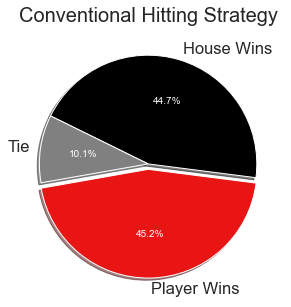

In [265]:
# pie chart
y = np.array([pc_wins, hc_wins, conv_ties])
explode = (0.05, 0, 0)
plt.figure(figsize = [5, 5])
_, _, autotexts = plt.pie(y, labels=['Player Wins', 'House Wins', 'Tie'], explode=explode, shadow=True, autopct='%1.1f%%',  
                          colors=['#e91515', '#000000', 'gray'], startangle=190)
# change percentage text to white
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Conventional Hitting Strategy', fontsize=20,)
;

### Player vs. House - Heavy Hitter vs. Conventional

In [266]:
# player heavy_hitter wins
ph_wins = heavy_df['player_wins'].sum()
ph_percentage = (ph_wins/10000) * 100

# heavy_hitter player, house wins
hh_wins = heavy_df['house_wins'].sum()
hh_percentage = (hh_wins/10000) * 100

# heavy_hitter ties
heavy_ties = heavy_df['tie'].sum()
heavy_ties_percentage = (heavy_ties/10000) * 100

print(f'Heavy Hitter Player Wins: {ph_wins}\nHeavy Hitter Player Percentage Wins: {ph_percentage:.2f}%')
print(f'Heavy Hitter House Wins: {hh_wins}\nHeavy Hitter House Percentage Wins: {hh_percentage:.2f}%')
print(f'Heavy Hitter Ties: {heavy_ties}\nHeavy Hitter Percentage Ties: {heavy_ties_percentage:.2f}%')

Heavy Hitter Player Wins: 4413
Heavy Hitter Player Percentage Wins: 44.13%
Heavy Hitter House Wins: 4726
Heavy Hitter House Percentage Wins: 47.26%
Heavy Hitter Ties: 861
Heavy Hitter Percentage Ties: 8.61%


''

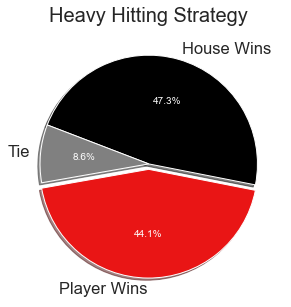

In [267]:
# pie chart
y = np.array([ph_wins, hh_wins, heavy_ties])
explode = (0.05, 0, 0)
plt.figure(figsize = [5, 5])
_, _, autotexts = plt.pie(y, labels=['Player Wins', 'House Wins', 'Tie'], explode=explode, shadow=True, autopct='%1.1f%%',  
                          colors=['#e91515', '#000000', 'gray'], startangle=190)
# change percentage text to white
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Heavy Hitting Strategy', fontsize=20,)
;

### Player vs. House - Safe Hitter vs. Conventional

In [268]:
# safe_hitter player, player wins
ps_wins = safe_df['player_wins'].sum()
ps_percentage = (ps_wins/10000) * 100

# safe_hitter player, house wins
hs_wins = safe_df['house_wins'].sum()
hs_percentage = (hs_wins/10000) * 100

# heavy_hitter ties
safe_ties = safe_df['tie'].sum()
safe_ties_percentage = (safe_ties/10000) * 100

print(f'Safe Hitter Player Wins: {ps_wins}\nSafe Hitter Player Percentage Wins: {ps_percentage:.2f}%')
print(f'Safe Hitter House Wins: {hs_wins}\nSafe Hitter House Percentage Wins: {hs_percentage:.2f}%')
print(f'Safe Hitter Ties: {safe_ties}\nSafe Hitter Percentage Ties: {safe_ties_percentage:.2f}%')

Safe Hitter Player Wins: 4067
Safe Hitter Player Percentage Wins: 40.67%
Safe Hitter House Wins: 5281
Safe Hitter House Percentage Wins: 52.81%
Safe Hitter Ties: 652
Safe Hitter Percentage Ties: 6.52%


''

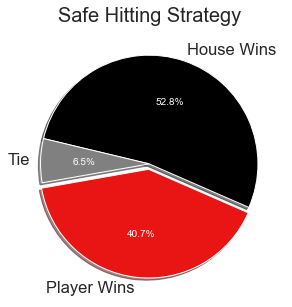

In [269]:
# pie chart
y = np.array([ps_wins, hs_wins, safe_ties])
explode = (0.05, 0, 0)
plt.figure(figsize = [5, 5])
_, _, autotexts = plt.pie(y, labels=['Player Wins', 'House Wins', 'Tie'], explode=explode, shadow=True, autopct='%1.1f%%',  
                          colors=['#e91515', '#000000', 'gray'], startangle=190)
# change percentage text to white
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Safe Hitting Strategy', fontsize=20,)
;

Interperet results
------

Now compare the strategies.
Which one is better? By how much?

In [270]:
results_df = df.groupby(['player_strategy', 'winner']).size().reset_index()\
.rename(columns={0:'wins'})
results_df

,player_strategy,winner,wins
0,conventional,house,4475
1,conventional,player,4520
2,conventional,tie,1005
3,heavy_hitter,house,4726
4,heavy_hitter,player,4413
5,heavy_hitter,tie,861
6,safe_hitter,house,5281
7,safe_hitter,player,4067
8,safe_hitter,tie,652


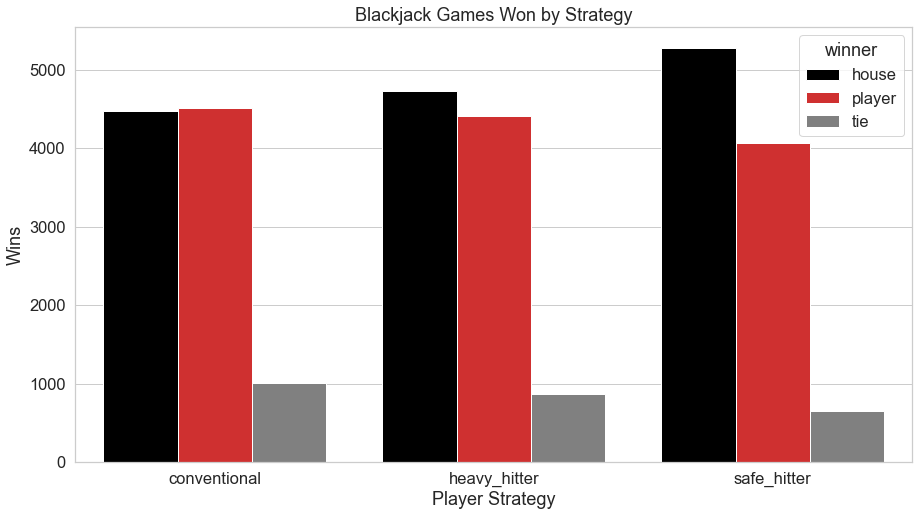

In [271]:
import seaborn as sns
palette = {
    'player': '#e91515',
    'house': '#000000',
    'tie': 'gray'
}
plt.figure(figsize = [15, 8])
sns.set(style="whitegrid", font_scale=1.5)
ax = sns.barplot(x='player_strategy', y='wins', hue='winner', data=results_df, palette=palette)
ax.set(xlabel='Player Strategy',
       ylabel='Wins',
       title='Blackjack Games Won by Strategy')

plt.show();

In [275]:
# conventional vs. heavy_hitting
conv_vs_heavy = pc_wins - ph_wins
# conventional vs. safe_hitting
conv_vs_safe = pc_wins - ps_wins
print(f'Conventional strategy won {conv_vs_heavy} more times than heavy_hitting strategy.')
print(f'Conventional strategy won {conv_vs_safe} more times than safe_hitting strategy.')

Conventional strategy won 107 more times than heavy_hitting strategy.
Conventional strategy won 453 more times than safe_hitting strategy.


Stretch Goals
-------

After you completed all of the requirements, think about attempting the stretch goals:

- Change the score from 21 to another number (e.g., 20 or 22). See how that effects the outcomes.
- Implement other strategies, including counting cards. Then generate data based on these different strategies and compare strategies.
- Add an option for a person to play interactively.
- Add an option for multiple people to interact.
- Add a betting component.
- Automatically decide if an Ace should be worth 1 or 11.
- Other ideas with instructor approval.


<br>
<br> 
<br>

----